# KMeans Learning

- `np.linalg.norm` to calculate vector distances
- `X[:, np.newaxis]` to add a new axis
- `X[np.random.permutation(len(X))[:K]]` selecting K points from X
  - `np.random.permutation` generates random permutation of indices
  - `[:K]` selects first K elements


In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
K = 3  # Number of clusters
MAX_ITER = 100  # Maximum number of iterations

np.random.seed(SEED)

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

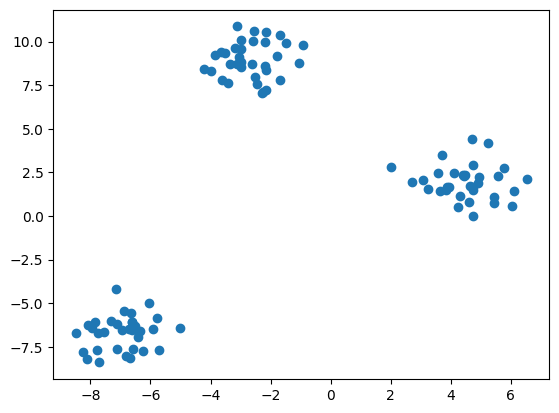

In [39]:
X, y = make_blobs(n_samples=100, centers=K, random_state=SEED)
print(X)
plt.scatter(X[:, 0], X[:, 1])

## Test of basic KMeans code


Initialising initial centroids, choosing random points from X to be a centroid


[[-5.79657595 -5.82630754]
 [-6.52183983 -6.31932507]
 [-5.72103161 -7.70079191]]


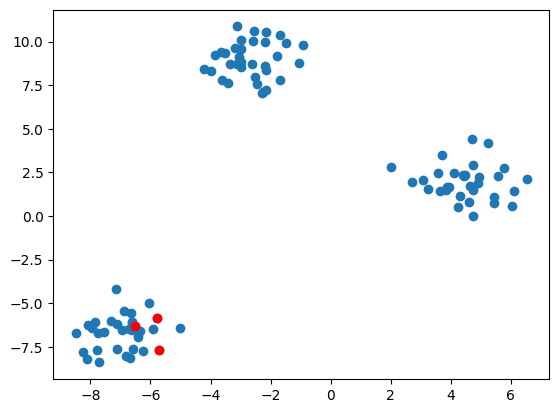

In [60]:
initial_centroids = X[np.random.permutation(len(X))[:K]]

print(initial_centroids)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red')

Then calculate the distance from each point to each centroid. The point will belong to the class of the centroid closest to it.


[2 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 2 1 2 1 0 0 2 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 2 0 1 0 0 0 1 1 0
 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


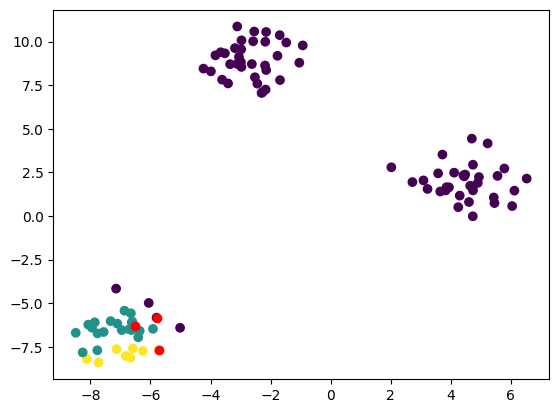

In [61]:
# Using numpy broadcasting
distances = np.linalg.norm(X[:, np.newaxis] - initial_centroids, axis=2)
classes = np.argmin(distances, axis=1)

print(classes)
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red')

Calculating the new centroids


In [77]:
X[classes == 0].mean(axis=0)

array([0.47558052, 4.87921671])

In [ ]:
# This is what I want to do
np.array([X[classes == 0].mean(axis=0), X[classes == 1].mean(
    axis=0), X[classes == 2].mean(axis=0)])

array([[ 0.47558052,  4.87921671],
       [-7.16083931, -6.45373774],
       [-6.87706403, -7.92635214]])

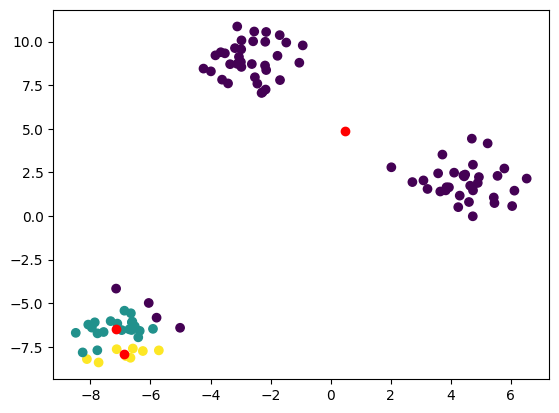

In [83]:
# Implemented
new_centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red')

New classes according to new centroids


[2 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 2 1 2 1 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 2 0 2 0 1 2 0 2 0 0 0 1 1 0
 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


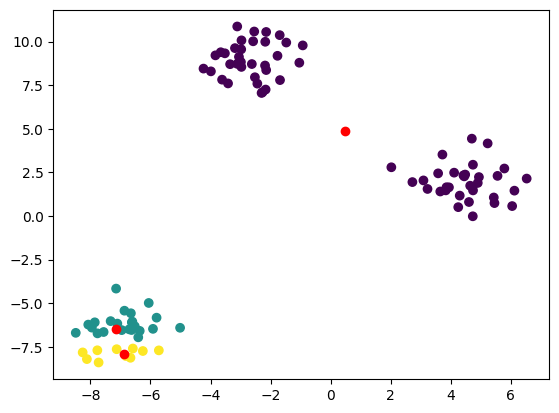

In [ ]:
distances = np.linalg.norm(X[:, np.newaxis] - new_centroids, axis=2)
classes = np.argmin(distances, axis=1)

print(classes)
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red')

## Naive KMeans

Runs for MAX_ITER


MAX_ITER=100
Ran for 100


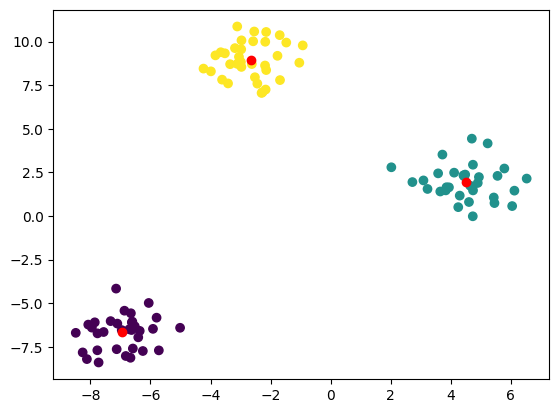

In [109]:
centroids = X[np.random.permutation(len(X))[:K]]
for i in range(MAX_ITER):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    classes = np.argmin(distances, axis=1)
    centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])

print(f'{MAX_ITER=}')
print(f'Ran for {i+1}')
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## KMeans with Convergence Check

Runs until centroids do not change much, up till MAX_ITER


MAX_ITER=100
Ran for 3


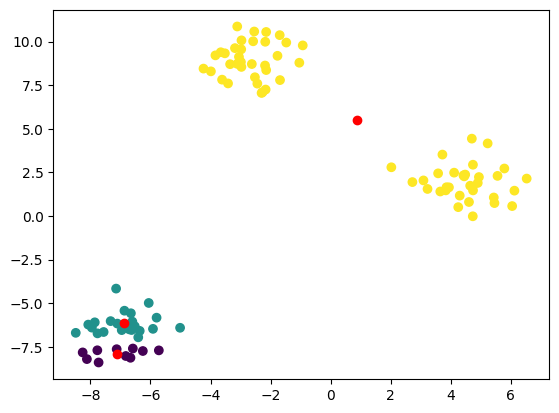

In [107]:
centroids = X[np.random.permutation(len(X))[:K]]

for i in range(MAX_ITER):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    classes = np.argmin(distances, axis=1)
    new_centroids = np.array([X[classes == k].mean(axis=0) for k in range(K)])

    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

print(f'{MAX_ITER=}')
print(f'Ran for {i+1}')

plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## Elbow Method


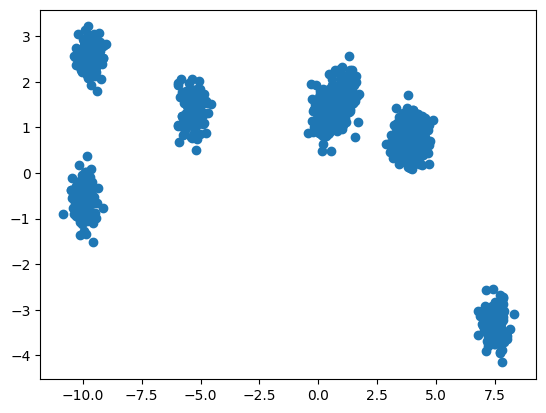

In [159]:
from sklearn.cluster import KMeans

X, y = make_blobs(1000, centers=8, cluster_std=0.3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Elbow method manually


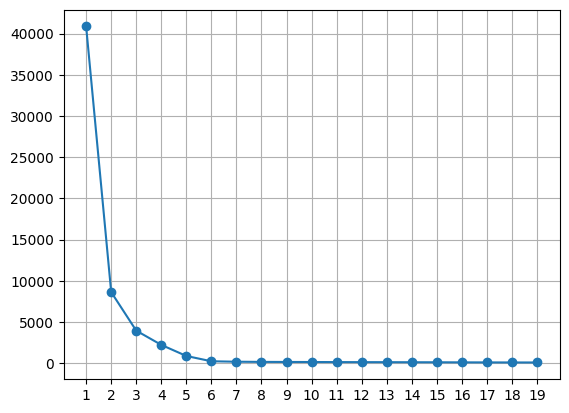

In [160]:
NUM_REPETITIONS = 20
inertia_arr = []

for i in range(1, NUM_REPETITIONS):
    kmeans = KMeans(n_clusters=i, random_state=SEED).fit(X)

    inertia = 0
    for k in range(i):
        cluster_points = X[kmeans.labels_ == k]
        centroid = kmeans.cluster_centers_[k]

        squared_dist = np.linalg.norm(cluster_points - centroid, axis=1) ** 2
        inertia += squared_dist.sum()

    inertia_arr.append(inertia)

plt.plot(range(1, NUM_REPETITIONS), inertia_arr, marker='o')
plt.xticks(range(1, NUM_REPETITIONS))
plt.grid(True)
plt.show()

### Elbow method using sklearn


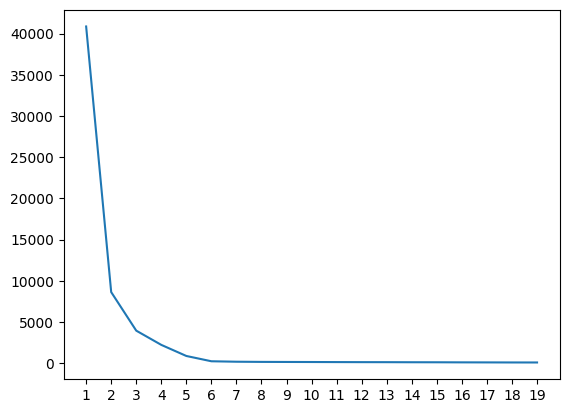

In [162]:
inertia_arr = []
for i in range(1, NUM_REPETITIONS):
    kmeans = KMeans(n_clusters=i, random_state=SEED).fit(X)
    inertia_arr.append(kmeans.inertia_)

plt.plot(range(1, NUM_REPETITIONS), inertia_arr)
plt.xticks(range(1, NUM_REPETITIONS))
plt.show()